# Creating dataset for model
In this notebook I'm processing source csvs into a aggregated dataframe with calculated sum of all hires and returns for each cluster for 30 minutes intervals. Output is "final_aggregated_df" 

In [1]:
import os
import sys
import polars as pl
import matplotlib.pyplot as plt

sys.path.append("..")
from src.dataset_preprocessing import process_pipeline, add_features
from src.paths import TF_CYCLING_DATA_DIR

%load_ext autoreload
%autoreload 2

In [2]:
csv_files = [os.path.join(TF_CYCLING_DATA_DIR, f) for f in os.listdir(TF_CYCLING_DATA_DIR) if f.endswith(".csv")]

I choose only few csv for an example:

In [3]:
aggregated_df, _ = process_pipeline(csv_files[10:15])

Processing 110JourneyDataExtract16May2018-22May2018.csv...
  Rows processed: 263405
  Rows dropped (nulls): 0
  Rows dropped (short trips): 0
  Total rows dropped: 0 (0.00%)
  Rows retained: 263405
Processing 111JourneyDataExtract23May2018-29May2018.csv...
  Rows processed: 230159
  Rows dropped (nulls): 0
  Rows dropped (short trips): 0
  Total rows dropped: 0 (0.00%)
  Rows retained: 230159
Processing 112JourneyDataExtract30May2018-05June2018.csv...
  Rows processed: 257345
  Rows dropped (nulls): 0
  Rows dropped (short trips): 0
  Total rows dropped: 0 (0.00%)
  Rows retained: 257345
Processing 113JourneyDataExtract06June2018-12June2018.csv...
  Rows processed: 270553
  Rows dropped (nulls): 0
  Rows dropped (short trips): 0
  Total rows dropped: 0 (0.00%)
  Rows retained: 270553
Processing 114JourneyDataExtract13June2018-19June2018.csv...
  Rows processed: 255200
  Rows dropped (nulls): 0
  Rows dropped (short trips): 0
  Total rows dropped: 0 (0.00%)
  Rows retained: 255200
✅ Pip

In [4]:
aggregated_df

Cluster,Interval,Starts,Ends
i64,datetime[μs],u32,u32
0,2018-05-16 00:00:00,15,2
0,2018-05-16 00:30:00,8,1
0,2018-05-16 01:00:00,15,5
0,2018-05-16 01:30:00,8,10
0,2018-05-16 02:00:00,1,3
…,…,…,…
29,2018-06-19 21:30:00,28,15
29,2018-06-19 22:00:00,23,14
29,2018-06-19 22:30:00,25,15


In [5]:
final_aggregated_df = add_features(aggregated_df)

In [6]:
final_aggregated_df

Cluster,Interval,Starts,Ends,DayOfWeek,HourOfDay,Month,DayOfYear,IsPeak,temperature_2m (°C),precipitation (mm),rain (mm),wind_speed_10m (km/h),Holiday
i64,datetime[μs],u32,u32,i8,i8,i8,i16,i8,f64,f64,f64,f64,i8
0,2018-05-16 00:00:00,15,2,3,0,5,136,0,11.5,0.0,0.0,7.8,0
1,2018-05-16 00:00:00,14,2,3,0,5,136,0,11.5,0.0,0.0,7.8,0
2,2018-05-16 00:00:00,11,7,3,0,5,136,0,11.5,0.0,0.0,7.8,0
3,2018-05-16 00:00:00,4,5,3,0,5,136,0,11.5,0.0,0.0,7.8,0
4,2018-05-16 00:00:00,1,1,3,0,5,136,0,11.5,0.0,0.0,7.8,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
25,2018-06-19 23:30:00,3,2,2,23,6,170,0,16.0,0.0,0.0,12.8,0
26,2018-06-19 23:30:00,3,8,2,23,6,170,0,16.0,0.0,0.0,12.8,0
27,2018-06-19 23:30:00,8,18,2,23,6,170,0,16.0,0.0,0.0,12.8,0


In [7]:
final_aggregated_df[final_aggregated_df["Starts"].arg_max()]

Cluster,Interval,Starts,Ends,DayOfWeek,HourOfDay,Month,DayOfYear,IsPeak,temperature_2m (°C),precipitation (mm),rain (mm),wind_speed_10m (km/h),Holiday
i64,datetime[μs],u32,u32,i8,i8,i8,i16,i8,f64,f64,f64,f64,i8
23,2018-05-22 17:30:00,366,115,2,17,5,142,1,18.7,0.0,0.0,24.7,0


In [8]:
final_aggregated_df.shape

(50400, 14)

In [9]:
final_aggregated_df[final_aggregated_df["Ends"].arg_max():final_aggregated_df["Ends"].arg_max()+10]

Cluster,Interval,Starts,Ends,DayOfWeek,HourOfDay,Month,DayOfYear,IsPeak,temperature_2m (°C),precipitation (mm),rain (mm),wind_speed_10m (km/h),Holiday
i64,datetime[μs],u32,u32,i8,i8,i8,i16,i8,f64,f64,f64,f64,i8
23,2018-06-07 08:30:00,109,408,4,8,6,158,1,13.1,0.3,0.3,11.2,0
24,2018-06-07 08:30:00,63,10,4,8,6,158,1,13.1,0.3,0.3,11.2,0
25,2018-06-07 08:30:00,63,70,4,8,6,158,1,13.1,0.3,0.3,11.2,0
26,2018-06-07 08:30:00,56,29,4,8,6,158,1,13.1,0.3,0.3,11.2,0
27,2018-06-07 08:30:00,62,48,4,8,6,158,1,13.1,0.3,0.3,11.2,0
28,2018-06-07 08:30:00,39,6,4,8,6,158,1,13.1,0.3,0.3,11.2,0
29,2018-06-07 08:30:00,118,150,4,8,6,158,1,13.1,0.3,0.3,11.2,0
0,2018-06-07 09:00:00,143,246,4,9,6,158,1,13.7,0.2,0.2,9.4,0
1,2018-06-07 09:00:00,72,134,4,9,6,158,1,13.7,0.2,0.2,9.4,0


In [10]:
filtered_df = final_aggregated_df.filter(pl.col("Cluster") == 0)
filtered_df = filtered_df[:300]
filtered_df

Cluster,Interval,Starts,Ends,DayOfWeek,HourOfDay,Month,DayOfYear,IsPeak,temperature_2m (°C),precipitation (mm),rain (mm),wind_speed_10m (km/h),Holiday
i64,datetime[μs],u32,u32,i8,i8,i8,i16,i8,f64,f64,f64,f64,i8
0,2018-05-16 00:00:00,15,2,3,0,5,136,0,11.5,0.0,0.0,7.8,0
0,2018-05-16 00:30:00,8,1,3,0,5,136,0,11.5,0.0,0.0,7.8,0
0,2018-05-16 01:00:00,15,5,3,1,5,136,0,11.4,0.0,0.0,7.2,0
0,2018-05-16 01:30:00,8,10,3,1,5,136,0,11.4,0.0,0.0,7.2,0
0,2018-05-16 02:00:00,1,3,3,2,5,136,0,11.7,0.0,0.0,8.5,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,2018-05-22 03:30:00,0,2,2,3,5,142,0,10.5,0.0,0.0,8.0,0
0,2018-05-22 04:00:00,0,1,2,4,5,142,0,9.9,0.0,0.0,7.5,0
0,2018-05-22 04:30:00,2,3,2,4,5,142,0,9.9,0.0,0.0,7.5,0


Visualisation of number of hires ("Starts") and returns ("Ends") for a few days.

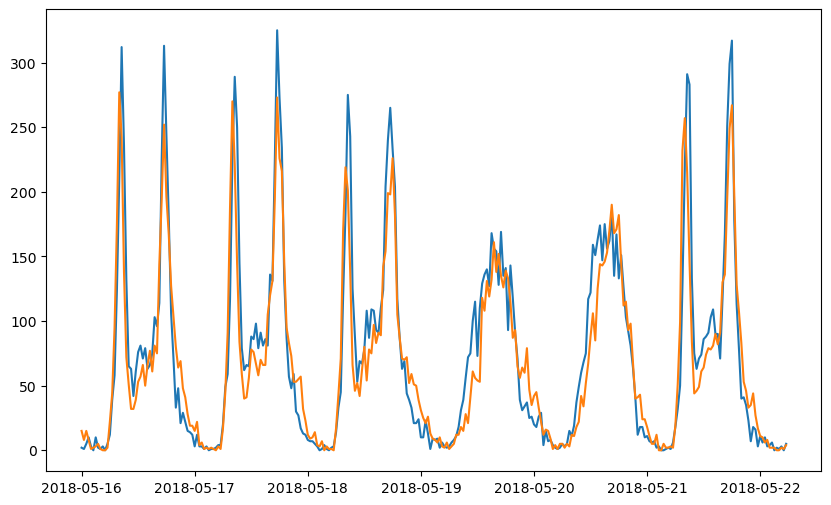

In [11]:
plt.figure(figsize=(10,6))
plt.plot(filtered_df["Interval"], filtered_df["Ends"])
plt.plot(filtered_df["Interval"], filtered_df["Starts"])
plt.show()